In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/pex.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/axjv.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/tags.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/bdd.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/fgm.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/vcsh.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/dxj.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/econ.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/vbk.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/qlta.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/tlt.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/crop.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/huse.us.txt
/kagg

In [2]:
import matplotlib.pyplot as plt
# import statsmodels.tsa.seasonal as smt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import datetime as dt
from sklearn import linear_model 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import copy
import warnings
warnings.filterwarnings('ignore')
# import plotly

In [3]:
from sklearn import tree
from sklearn import ensemble
from sklearn import 

SyntaxError: invalid syntax (<ipython-input-3-d47923f5ab60>, line 3)

In [4]:
# filenames = ['prk.us.txt', 'bgr.us.txt', 'jci.us.txt', 'aa.us.txt', 'fr.us.txt', 'star.us.txt', 'sons.us.txt', 'ipl_d.us.txt', 'sna.us.txt', 'utg.us.txt']

In [5]:
# filenames = [filenames[1]]
df = pd.read_csv('/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/hewg.us.txt', sep=',')
#     df['Label'] = filename
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2014-02-20,21.924,21.933,21.924,21.933,3708,0
1,2014-02-21,22.031,22.031,22.031,22.031,393,0
2,2014-03-14,20.607,20.642,20.580,20.642,2135,0
3,2014-03-17,20.856,20.936,20.856,20.936,4492,0
4,2014-03-21,21.220,21.220,21.096,21.105,4142,0


In [7]:
def check_dates(dates_column):
    ''' Given the dates column this checks if data is in proper order or not'''
    dates = []
    for x in dates_column:
        dates.append(x)
    dates2 = copy.deepcopy(dates)
    dates2.sort()
    if(dates2 == dates):
        print("Time series data is already in proper order")
    else:
        print("Time series data is out of order")

In [8]:
def details(df, column):
    ''' Given a dataframe and column it returns max, min, std, avg '''
    print("Maximum value in column %s for dataframe is %d" %(column, np.max(df[column])))
    print("Minimum value in column %s for dataframe is %d" %(column, np.min(df[column])))
    print("Mean value in column %s for dataframe is %d" %(column, np.mean(df[column])))
    print("Standard deviation value in column %s for dataframe is %d" %(column, np.std(df[column])))

In [9]:
check_dates(df['Date'])

Time series data is already in proper order


In [10]:
df.isnull().any().any() # No row has null values

False

In [11]:
def check_missing(column, check_df):
    if(check_df[column].isnull().any()):
        print("Number of rows having the NULL value in ",check_df," are ",check_df[column].isnull().sum())
    else:
        print("There is no NULL vale in the column", column)

In [12]:
def encode_categorical(df, column_list):
    for column in column_list:
        df[column] = df[column].astype('str')
        encoder = LabelEncoder()
        encoded_list = encoder.fit_transform(df[column])
#         print(encoded_list)
#         print(len(encoded_list))
        encoded_series = pd.Series(encoded_list)
        df[column] = encoded_series
        print("The ", column, "is encoded ")
    return(df)

In [13]:
def plot_data(df, column1, column2):
    plt.plot(df[column1], df[column2])
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()

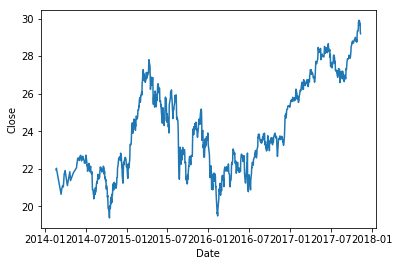

In [14]:
plot_data(df, 'Date', 'Close')

In [15]:
column_list = ['Date']
encode_categorical(df, column_list)

The  Date is encoded 


,Date,Open,High,Low,Close,Volume,OpenInt
0,0,21.924,21.9330,21.9240,21.933,3708,0
1,1,22.031,22.0310,22.0310,22.031,393,0
2,2,20.607,20.6420,20.5800,20.642,2135,0
3,3,20.856,20.9360,20.8560,20.936,4492,0
4,4,21.220,21.2200,21.0960,21.105,4142,0
...,...,...,...,...,...,...,...
884,884,29.830,29.8800,29.8300,29.850,145322,0
885,885,29.850,29.8800,29.6400,29.640,104422,0
886,886,29.660,29.7600,29.6300,29.720,383533,0
887,887,29.380,29.3942,29.1400,29.300,159819,0


In [16]:
df.drop('OpenInt', axis = 1, inplace = True)

In [17]:
df.head()

,Date,Open,High,Low,Close,Volume
0,0,21.924,21.933,21.924,21.933,3708
1,1,22.031,22.031,22.031,22.031,393
2,2,20.607,20.642,20.580,20.642,2135
3,3,20.856,20.936,20.856,20.936,4492
4,4,21.220,21.220,21.096,21.105,4142


In [18]:
# Train the model on first x% data and test on remaining 100 - x %
def split_time_series_simple(df, perc_split):
    calc_split = int(len(df) * perc_split)
    train_df = df[:calc_split]
    test_df = df[calc_split:]
    print("Length of the train data_frame is %d" %(len(train_df)))
    print("Length of the test data_frame is %d" %(len(test_df)))
    return(train_df, test_df)

In [19]:
# Train the model on first 80% data and test on remaining 20 %
train_df, test_df = split_time_series_simple(df, 0.8)

Length of the train data_frame is 711
Length of the test data_frame is 178


In [20]:
def split_into_X_Y(df, Y_column):
    Y_t = df[Y_column].to_numpy(dtype = 'float32')
    df.drop(Y_column, axis = 1, inplace = True)
    X_t = df.to_numpy(dtype = 'float32')
    return(X_t, Y_t)

In [21]:
X_train, Y_train = split_into_X_Y(train_df, 'Close')

In [22]:
X_test, Y_test = split_into_X_Y(test_df, 'Close')

In [23]:
print(X_train.shape)
print(Y_train.shape)

(711, 5)
(711,)


In [24]:
# Using Ensemble Methods for predictions
clf1 = tree.DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=3, random_state = 0)

NameError: name 'tree' is not defined

In [25]:
clf1 = clf.fit(X_train, Y_train)
print(clf1.score(X_train, Y_train))
print(clf1.score(X_test, Y_test))

NameError: name 'clf' is not defined

In [26]:
pred_test_arr = clf.predict(X_test)

NameError: name 'clf' is not defined

In [27]:
# Overfitting
pred_train_arr = clf.predict(X_train)
plt.plot(train_df['Date'], pred_train_arr)
plt.plot(train_df['Date'], Y_train)
plt.show()

NameError: name 'clf' is not defined

In [28]:
plt.plot(test_df['Date'], pred_test_arr)
plt.plot(test_df['Date'], Y_test)
plt.show()

NameError: name 'pred_test_arr' is not defined